# Artifact analysis
#### Adam Klie<br>05/30/2020
Analyze Qiime2 feature table

In [1]:
import qiime2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

In [2]:
data_dir = '../results/qiime'

#### Load metadata

In [3]:
m_data = qiime2.Metadata.load('{}/sample_metadata.tsv'.format(data_dir))

In [4]:
metadata_df = m_data.to_dataframe()

In [5]:
metadata_df.head()

,gender,condition,recurrence
sampleid,,,
SRR9094428.unmapped,female,cancer,yes
SRR9094429.unmapped,female,cancer,yes
SRR9094430.unmapped,female,cancer,yes
SRR9094431.unmapped,female,cancer,yes
SRR9094432.unmapped,female,cancer,yes


#### Load in feature table artifact
1. Save as pd.DataFrame
2. Grab per feature counts

In [18]:
f_table = qiime2.Artifact.load('{}/feature-table.qza'.format(data_dir))

In [28]:
#qiime2.Visualization.load('{}/feature-table.qzv'.format(data_dir))

In [29]:
feature_df = f_table.view(pd.DataFrame)

In [30]:
feature_df.head()

,80840,119060,32008,292,482957,60552,179879,488731,95486,60550,...,336988,712528,1954172,120962,106,2025876,277944,1714845,1349,1299
SRR9094428.unmapped,225.0,37.0,395.0,322.0,52.0,30.0,22.0,21.0,17.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR9094429.unmapped,519.0,228.0,980.0,847.0,51.0,0.0,1.0,15.0,54.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR9094430.unmapped,168.0,53.0,353.0,203.0,10.0,0.0,0.0,18.0,30.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR9094431.unmapped,61.0,38.0,211.0,174.0,17.0,0.0,4.0,4.0,24.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR9094432.unmapped,79.0,42.0,310.0,207.0,23.0,0.0,0.0,1.0,51.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
feature_df.to_csv('{}/dataframes/feature_table.tsv'.format(data_dir), '\t', index=True)

In [32]:
feature_counts = pd.DataFrame(feature_df.sum(axis=0), columns=["count"])

In [33]:
feature_counts.head()

,count
80840,67624.0
119060,13576.0
32008,51119.0
292,35766.0
482957,3887.0


#### Load in taxonomy artifact
1. Save as pd.DataFrame
2. Plot taxominc grouping fractions

In [37]:
tax = qiime2.Artifact.load('{}/feature-taxonomy.qza'.format(data_dir))

In [38]:
#qiime2.Visualization.load('{}/feature-taxonomy.qzv'.format(data_dir))

In [39]:
tax_df = tax.view(pd.DataFrame)

In [40]:
tax_df.head()

,Taxon
Feature ID,
80840,k__Bacteria; p__Proteobacteria; c__Betaproteob...
119060,k__Bacteria; p__Proteobacteria; c__Betaproteob...
32008,k__Bacteria; p__Proteobacteria; c__Betaproteob...
292,k__Bacteria; p__Proteobacteria; c__Betaproteob...
482957,k__Bacteria; p__Proteobacteria; c__Betaproteob...


In [41]:
tax_df.to_csv('{}/dataframes/feature_taxonomy.tsv'.format(data_dir), '\t', index=True)

In [65]:
taxon_counts = {"k":0, "p":0, "c":0, "o":0, "f":0, "g":0, "s":0}
for classification in tax_df["Taxon"].values:
    taxons = classification.split('; ')
    for i, cl in enumerate(taxons):
        if i > 0 and len(cl) < 4:
            taxon_counts[taxons[i-1][0]] += 1
            break
        if i == len(taxons)-1:
            taxon_counts[taxons[len(taxons)-1][0]] += 1

In [66]:
taxon_counts = pd.Series(taxon_counts)

In [67]:
taxon_frac = taxon_counts/taxon_counts.sum()

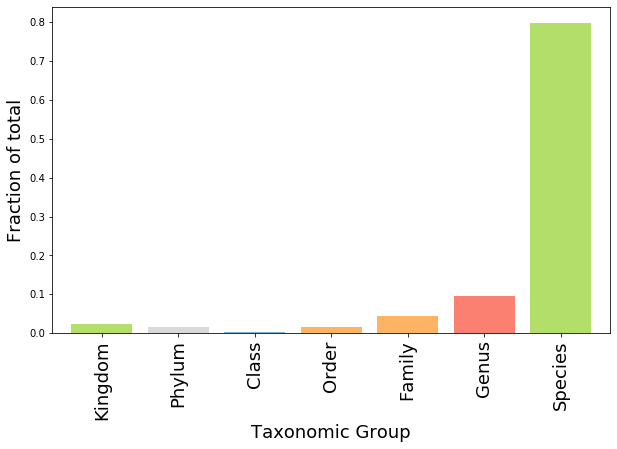

In [73]:
ax = plt.figure(figsize=(10,6))
ax = taxon_frac.plot.bar(color=[set_three(np.random.random()) for i in range(len(taxon_frac))], width=0.8)
ax.set_xlabel("Taxonomic Group", fontsize=18)
ax.set_ylabel("Fraction of total", fontsize=18)
ax.set_xticklabels(["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"], fontsize=18)
plt.savefig('{}/figures/taxon_groupings.png'.format(data_dir))

#### Classification
1. Save DataFrames with
 - Feature details
 - Test set classifcation results

In [75]:
# Choose model version
version = 'v1'
class_dir = '{}/dataframes/classification_{}'.format(data_dir, version)

In [76]:
class_dir

'../results/qiime/dataframes/classification_v1'

In [77]:
# Choose either 'cancer' or 'recurrence'
classification_type = 'cancer'
cancer_dir = '{}/{}_classification/{}'.format(data_dir, classification_type, version)
cancer_dir

'../results/qiime/cancer_classification/v1'

##### Model

In [78]:
#qiime2.Visualization.load('{}/accuracy_results.qzv'.format(cancer_dir))
#qiime2.Visualization.load('{}/model_summary.qzv'.format(cancer_dir))
#qiime2.Visualization.load('{}/heatmap.qzv'.format(cancer_dir))

##### Features

In [79]:
importance_df = qiime2.Artifact.load('{}/feature_importance.qza'.format(cancer_dir)).view(pd.DataFrame)

In [80]:
model_features = pd.concat([tax_df, importance_df, feature_counts], axis=1, join='inner')

In [81]:
model_features.sort_values("importance", ascending=False).head()

,Taxon,importance,count
29442,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.043588,262354.0
1773,k__Bacteria; p__Actinobacteria; c__Actinobacte...,0.038742,17048.0
1916,k__Bacteria; p__Actinobacteria; c__Actinobacte...,0.026586,1595.0
1280,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...,0.026414,13888.0
44008,k__Bacteria; p__Firmicutes; c__Bacilli; o__Lac...,0.026107,5515.0


In [82]:
model_features.to_csv('{}/{}_model_features_{}.tsv'.format(class_dir, classification_type, version), sep='\t')

##### Samples

In [83]:
prediction_s = qiime2.Artifact.load('{}/predictions.qza'.format(cancer_dir)).view(pd.Series)
probability_df = qiime2.Artifact.load('{}/probabilities.qza'.format(cancer_dir)).view(pd.DataFrame)
estimator = qiime2.Artifact.load('{}/sample_estimator.qza'.format(cancer_dir))

In [84]:
estimator.export_data(cancer_dir)

In [85]:
probability_df.shape

(26, 2)

In [86]:
prediction_df = pd.DataFrame(data=prediction_s.values, index=prediction_s.index, columns = ["predicted_label"])

In [87]:
model_predictions = pd.concat([probability_df, prediction_df], axis=1, join='inner')

In [88]:
model_predictions.head()

,cancer,normal,predicted_label
id,,,
SRR9094464.unmapped,0.967236,0.032764,cancer
SRR9094551.unmapped,0.131802,0.868198,normal
SRR9094490.unmapped,0.983494,0.016506,cancer
SRR9094552.unmapped,0.078115,0.921885,normal
SRR9094468.unmapped,0.982244,0.017756,cancer


In [89]:
model_samples = metadata_df.merge(model_predictions, left_index=True, right_index=True)

In [90]:
model_samples.head()

,gender,condition,recurrence,cancer,normal,predicted_label
SRR9094428.unmapped,female,cancer,yes,0.951289,0.048711,cancer
SRR9094443.unmapped,female,cancer,yes,0.992494,0.007506,cancer
SRR9094453.unmapped,female,cancer,yes,0.970331,0.029669,cancer
SRR9094458.unmapped,female,cancer,no,0.981522,0.018478,cancer
SRR9094460.unmapped,female,cancer,no,0.979855,0.020145,cancer


In [91]:
model_samples.to_csv('{}/{}_model_predictions_{}.tsv'.format(class_dir, classification_type, version), sep='\t')